In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv(r'Data\salary.csv')

In [94]:
x = data.iloc[:,1:2].values
y = data.iloc[:,2:].values

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y)
x_poly = PolynomialFeatures(degree=4).fit_transform(x)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

poly_reg = LinearRegression().fit(x_poly,y)
svr_reg = SVR(kernel='rbf').fit(x_scaled,y_scaled)
dt_reg = DecisionTreeRegressor(random_state=0).fit(x,y)
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0).fit(x,y)

c:\Users\Utkut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Utkut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [97]:
poly_reg_pred = poly_reg.predict(x_poly)
svr_reg_pred = svr_reg.predict(x_scaled)
dt_reg_pred = dt_reg.predict(x)
rf_reg_pred = rf_reg.predict(x)

Text(0, 0.5, 'Salary')

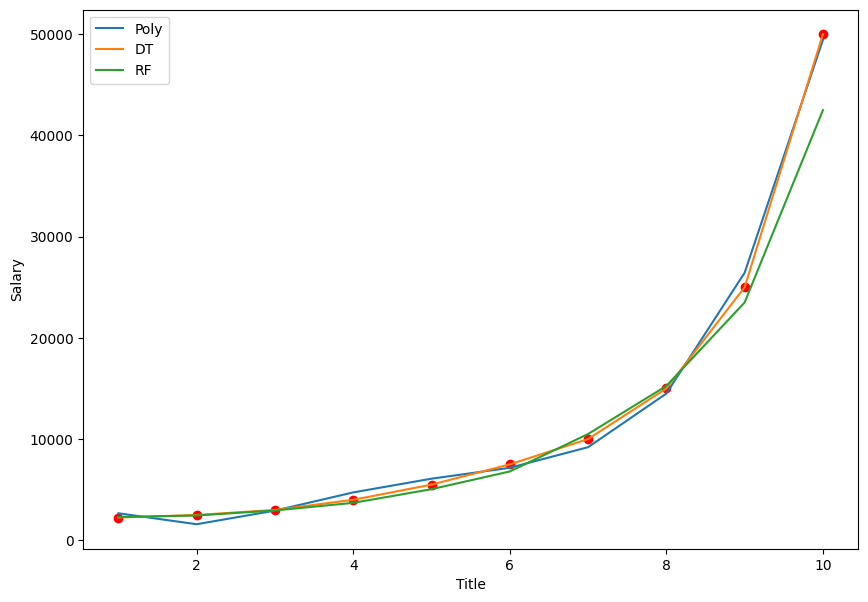

In [103]:
plt.figure(figsize=(10,7))
plt.scatter(x,y,color = 'red')
plt.plot(x,poly_reg_pred,label="Poly")
plt.plot(x,dt_reg_pred,label="DT")
plt.plot(x,rf_reg_pred,label="RF")
plt.xlabel('Title')
plt.ylabel('Salary')
plt.legend()

In [99]:
from sklearn.metrics import r2_score

print(r2_score(y,poly_reg_pred))
print(r2_score(y_scaled,svr_reg_pred))
print(r2_score(y,dt_reg_pred))
print(r2_score(y,rf_reg_pred))

0.9973922891706614
0.7513836788854973
1.0
0.9704434230386582


In [100]:
print(poly_reg.predict(PolynomialFeatures(degree=4).fit_transform([[9.4]])))
print(svr_reg.predict([[9.4]]))
print(dt_reg.predict([[9.4]]))
print(rf_reg.predict([[9.4]]))

[[34025.47272728]]
[0.01150915]
[25000.]
[37500.]
